# Loading & Manipulating US Maps

Let's introduce Census shapefiles for counties and states:

- Restrict to CONUS
- Create display geometries
- **Merge** US Census demographic data


In [46]:
#First load geopandas plus other standard libraries, as usual
#####

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [47]:
#Suppress some spurious warnings
import warnings
warnings.filterwarnings("ignore")

## Census Shapefiles

Recall the ESRI shapefile (shp):

- Multiple files
- Best to put in single folder
- Variable names limited to 10 characters
- Can load directly from url with geopandas...

In [48]:
#Get shapefile data directly from census URLs: Do both counties and states
#########

#Load the counties and states:
#URLs:
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_500k.zip'
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_500k.zip'

#Lines to load:
county_gdf = gpd.read_file(url_county)
state_gdf = gpd.read_file(url_state)

In [49]:
#Check out the counties
county_gdf.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       NAME  \
0      20      161  00485044  0500000US20161  20161      Riley   
1      19      159  00465268  0500000US19159  19159   Ringgold   
2      30      009  01720111  0500000US30009  30009     Carbon   
3      16      007  00395090  0500000US16007  16007  Bear Lake   
4      55      011  01581065  0500000US55011  55011    Buffalo   

           NAMELSAD STUSPS STATE_NAME LSAD       ALAND     AWATER  \
0      Riley County     KS     Kansas   06  1579077672   32047392   
1   Ringgold County     IA       Iowa   06  1386932347    8723135   
2     Carbon County     MT    Montana   06  5303728455   35213028   
3  Bear Lake County     ID      Idaho   06  2527123155  191364281   
4    Buffalo County     WI  Wisconsin   06  1750290818   87549529   

                                            geometry  
0  POLYGON ((-96.96095 39.28670, -96.96106 39.288...  
1  POLYGON ((-94.47167 40.81255, -94.47166 40.819...  
2  POLYGON ((-109.79867 45.16734, -109.68779 45.1...  
3  POLYGON ((-111.63452 42.57034, -111.63010 42.5...  
4  POLYGON ((-92.08384 44.41200, -92.08310 44.414...

In [50]:
#And the states
state_gdf.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      56  01779807  0400000US56    56     WY         Wyoming   00   
1      02  01785533  0400000US02    02     AK          Alaska   00   
2      24  01714934  0400000US24    24     MD        Maryland   00   
3      60  01802701  0400000US60    60     AS  American Samoa   00   
4      05  00068085  0400000US05    05     AR        Arkansas   00   

           ALAND        AWATER  \
0   251458712294    1867503716   
1  1478942847588  245378425142   
2    25151992308    6979074857   
3      197759069    1307243751   
4   134660767709    3121950081   

                                            geometry  
0  POLYGON ((-111.05456 45.00095, -111.04507 45.0...  
1  MULTIPOLYGON (((179.48246 51.98283, 179.48657 ...  
2  MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ...  
3  MULTIPOLYGON (((-168.14582 -14.54791, -168.145...  
4  POLYGON ((-94.61792 36.49941, -94.61765 36.499...

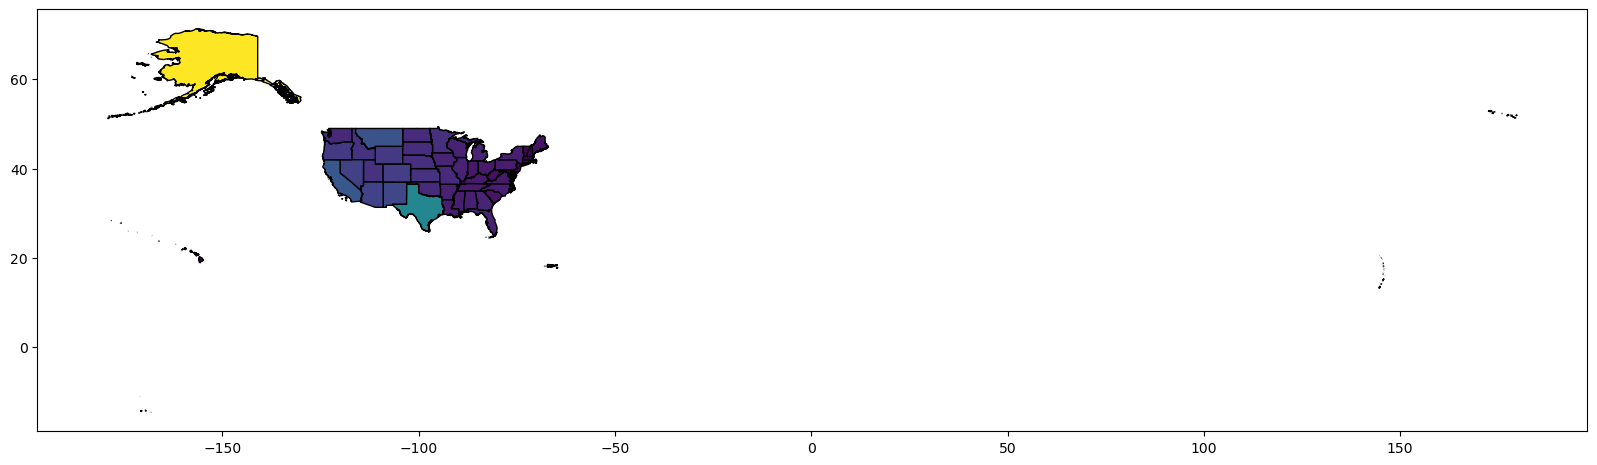

In [51]:
#And Plot
fig, my_ax = plt.subplots(1,1, figsize=(20, 10))

state_gdf.plot(ax = my_ax, linewidth = 1, edgecolor = 'black', column = 'ALAND');

(51.0, 54.0)

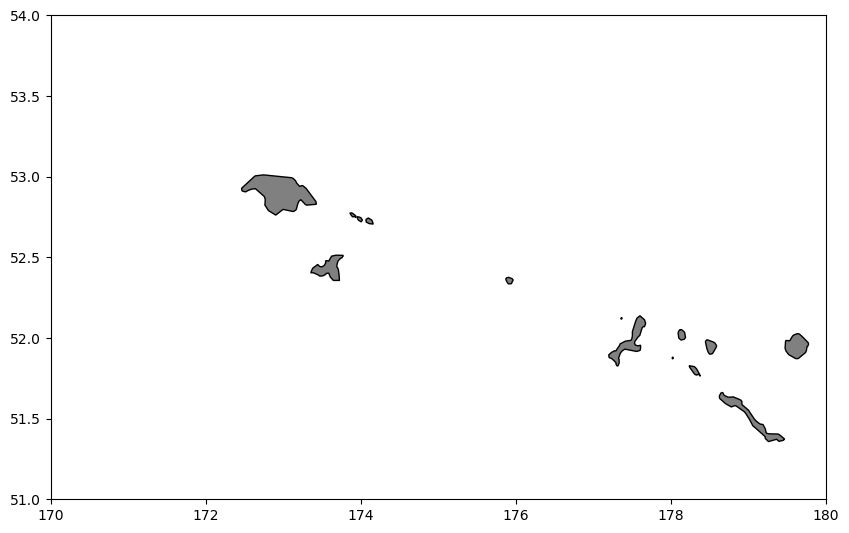

In [52]:
#Let's zoom in on the "Near Islands" and the "Rat Islands"
fig, my_ax = plt.subplots(1,1, figsize=(10, 8))

state_gdf.loc[state_gdf.STATEFP == '02'].plot(ax = my_ax, edgecolor = 'black', facecolor='grey')

#Set our limits:
my_ax.set_xlim([170, 180])
my_ax.set_ylim([51, 54])

#### Note the CRS:

In [53]:
state_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

#### Consider the (North American) Albers Equal Area Conic

- Projection cone
- Choose 2 standard parallels to intersect sphere
- Distortion minimized between parallels
- Project onto cone from inside sphere
- N. American Albers standard for US Government (+NAD83 datum)

<img src="albers_fig.png" width=650 />

<img src="albers_fig2.png" width=450 />


In [54]:
## Let's convert CRS to North American Albers, EPSG 5070
##########

county_gdf = county_gdf.to_crs(5070)
state_gdf = state_gdf.to_crs(5070)

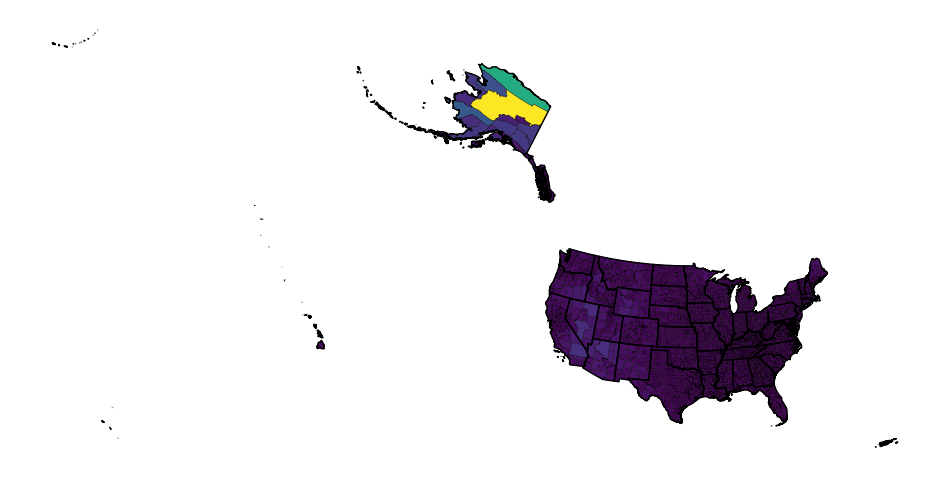

In [55]:
#Plot the result!
##########
fig, ax1 = plt.subplots(1,1, figsize=(12, 8))

#Draw the counties:
county_gdf.plot(ax = ax1, linewidth = .25, edgecolor = 'black', column = 'ALAND')

#And the states as outline
state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()

<AxesSubplot: >

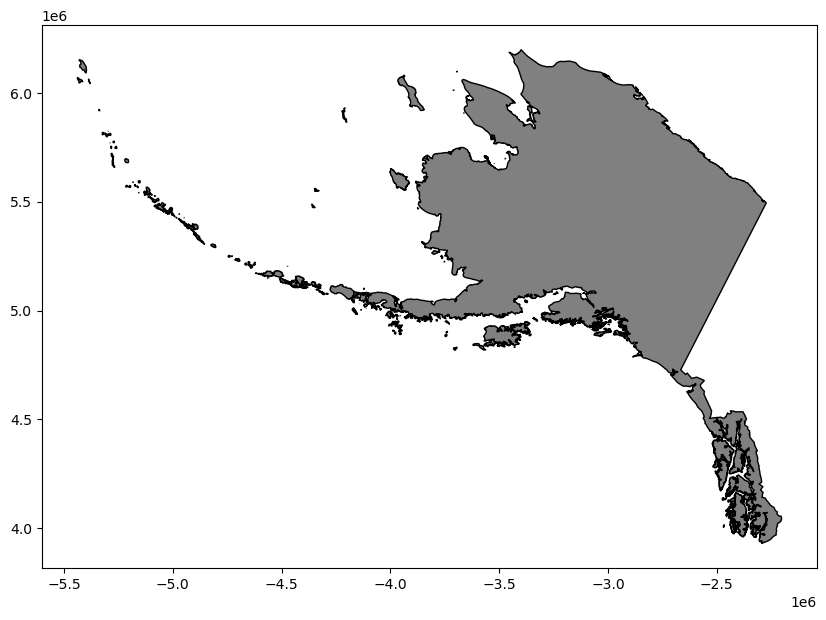

In [57]:
#Note Alaska Now:
fig, ax1 = plt.subplots(1,1, figsize=(10, 8))

state_gdf.loc[state_gdf.STATEFP == '02'].plot(ax = ax1, edgecolor = 'black', facecolor='grey')

### Restrict to the Contiguous US:

In [58]:
#We can exclude everthing outside the contiguous US:
#########

#Hawaii = 15, Alasksa = 02, Puerto Rico = 72
#Guam = 66, Northern Mariana Islands = 69, American Samoa = 60, Virgin Islands = 78

#Note the astype('int') method:
#Could do:
#state_gdf = state_gdf.loc[(state_gdf.STATEFP.astype(int) != 15) & 
#                           (state_gdf.STATEFP.astype(int) != 72) &
#                           (state_gdf.STATEFP.astype(int) != 2) &
#                           (state_gdf.STATEFP.astype(int) != 60) &
#                           (state_gdf.STATEFP.astype(int) != 66) &
#                           (state_gdf.STATEFP.astype(int) != 69) &
#                           (state_gdf.STATEFP.astype(int) != 78)]

#Or, more compactly:
exclude_list = [15, 72, 2, 60, 66, 69, 78]

#~ is not
state_gdf = state_gdf.loc[~state_gdf['STATEFP'].astype(int).isin(exclude_list)]
county_gdf = county_gdf.loc[~county_gdf['STATEFP'].astype(int).isin(exclude_list)]

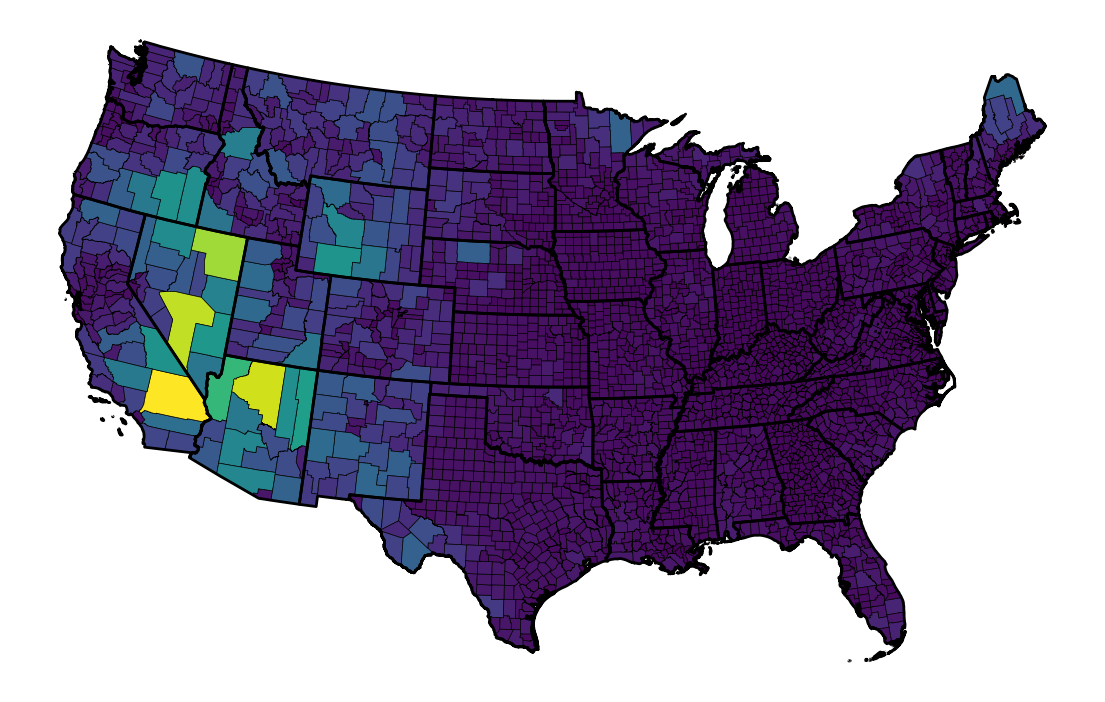

In [59]:
#And triumphantly plot again
##########
fig, ax1 = plt.subplots(1,1, figsize=(14, 10))

#Draw the counties:
county_gdf.plot(ax = ax1, linewidth = .5, edgecolor = 'black', column = 'ALAND')

#And the states as outline
state_gdf.plot(ax = ax1, linewidth = 2, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()

### OR: Move Alaska and Hawaii for display purposes

<AxesSubplot: >

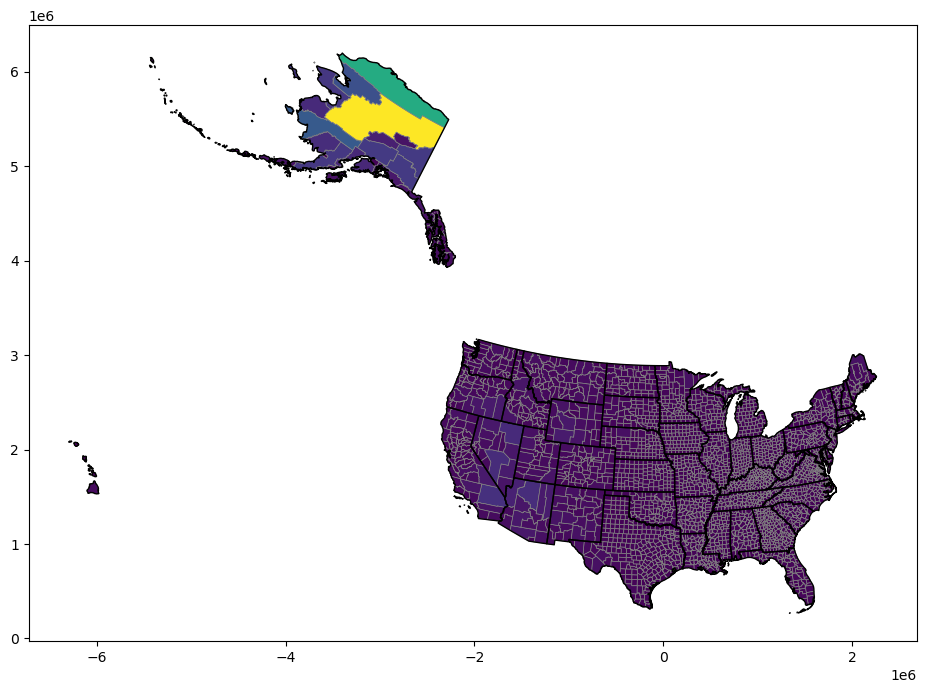

In [60]:
#Move AK and HI to better locations?
######

#Once again, get shapefile data directly from census URLs: Just do both counties and states here
#########

#Load the counties
url_county = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_county_5m.zip'
url_state = 'https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_5m.zip'

county_gdf2 = gpd.read_file(url_county)
state_gdf2 = gpd.read_file(url_state)

#Exclusions
#02 - AK, 15 = HI, 72 = PR
exclude_list = [72, 60, 66, 69, 78]

state_gdf2 = state_gdf2.loc[~state_gdf2['STATEFP'].astype(int).isin(exclude_list)]
county_gdf2 = county_gdf2.loc[~county_gdf2['STATEFP'].astype(int).isin(exclude_list)]


#Convert to North American Albers
county_gdf2 = county_gdf2.to_crs(5070)
state_gdf2 = state_gdf2.to_crs(5070)


#Display results:
fig, my_ax = plt.subplots(1,1, figsize=(12, 8))
county_gdf2.plot(ax = my_ax, linewidth = .5, edgecolor = 'grey', column = 'ALAND')
state_gdf2.plot(ax = my_ax, linewidth = 1, edgecolor = 'black', facecolor = 'none')


In [61]:
#3 will be the ones with translated AK/HI
state_gdf3 = state_gdf2.copy()
county_gdf3 = county_gdf2.copy()

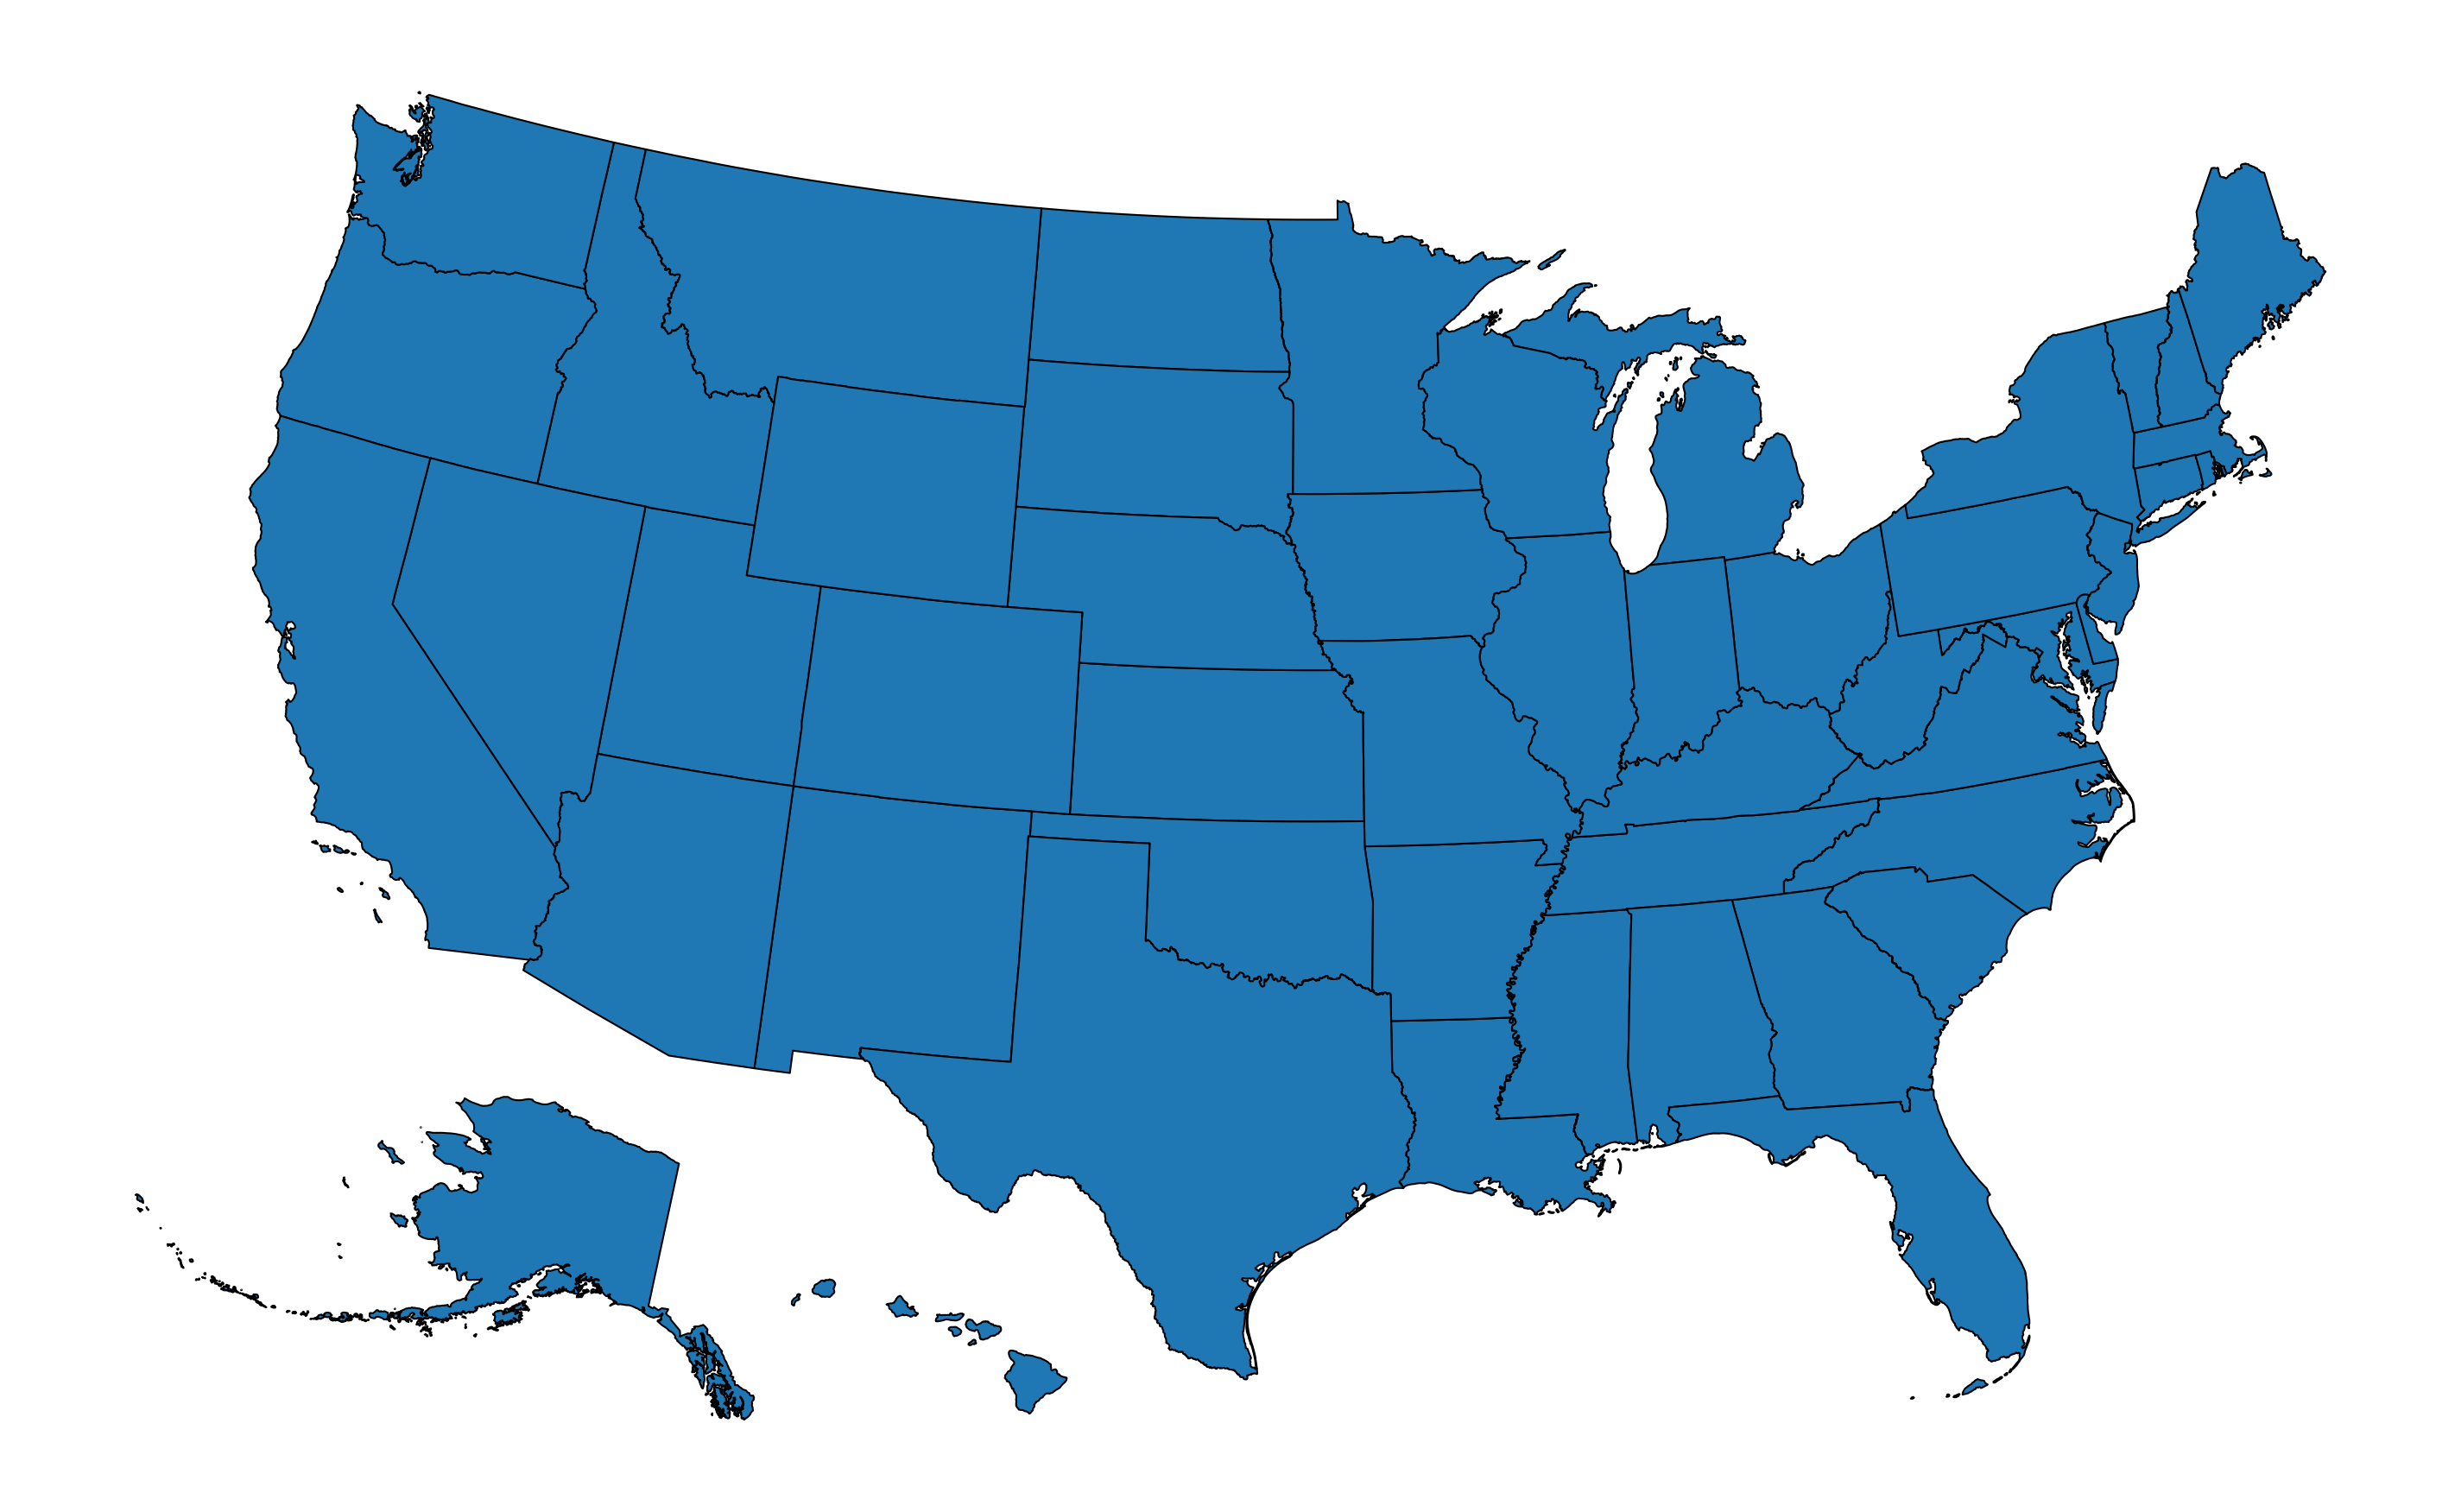

In [62]:
#Translate and shrink AK, HI
###


#Parameters for translation, scaling, and rotating:
ak_x_translate = 1.4e6; ak_y_translate = -4.7e6
ak_x_scale = .375; ak_y_scale = .375
ak_rotate = 15

hi_x_translate = 5.35e6; hi_y_translate = -1.33e6
hi_x_scale = 1; hi_y_scale = 1
hi_rotate = 45



#Alaska:
###
ak_gdf = state_gdf2.loc[state_gdf2.STATEFP == '02']


#Translate, scale, and rotate:
ak_gdf.geometry = ak_gdf.geometry.translate(xoff=ak_x_translate, yoff=ak_y_translate)
ak_gdf.geometry = ak_gdf.geometry.scale(xfact=ak_x_scale, yfact=ak_y_scale, origin=(ak_gdf.centroid.x.values[0], ak_gdf.centroid.y.values[0]))
ak_gdf.geometry = ak_gdf.geometry.rotate(angle = ak_rotate, origin=(ak_gdf.centroid.x.values[0], ak_gdf.centroid.y.values[0]))


#Hawaii
###
hi_gdf = state_gdf2.loc[state_gdf2.STATEFP == '15']

hi_gdf.geometry = hi_gdf.geometry.translate(xoff=hi_x_translate, yoff=hi_y_translate)
hi_gdf.geometry = hi_gdf.geometry.scale(xfact=hi_x_scale, yfact=hi_y_scale, origin='center')
hi_gdf.geometry = hi_gdf.geometry.rotate(angle = hi_rotate, origin=(hi_gdf.centroid.x.values[0], hi_gdf.centroid.y.values[0]))


#Now, change our geometries:
state_gdf3['geometry'].loc[state_gdf3.STATEFP == '02'] = ak_gdf.geometry
state_gdf3['geometry'].loc[state_gdf3.STATEFP == '15'] = hi_gdf.geometry


#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)
state_gdf3.plot(ax = ax1, linewidth=.5, edgecolor='black')

ax1.set_axis_off()

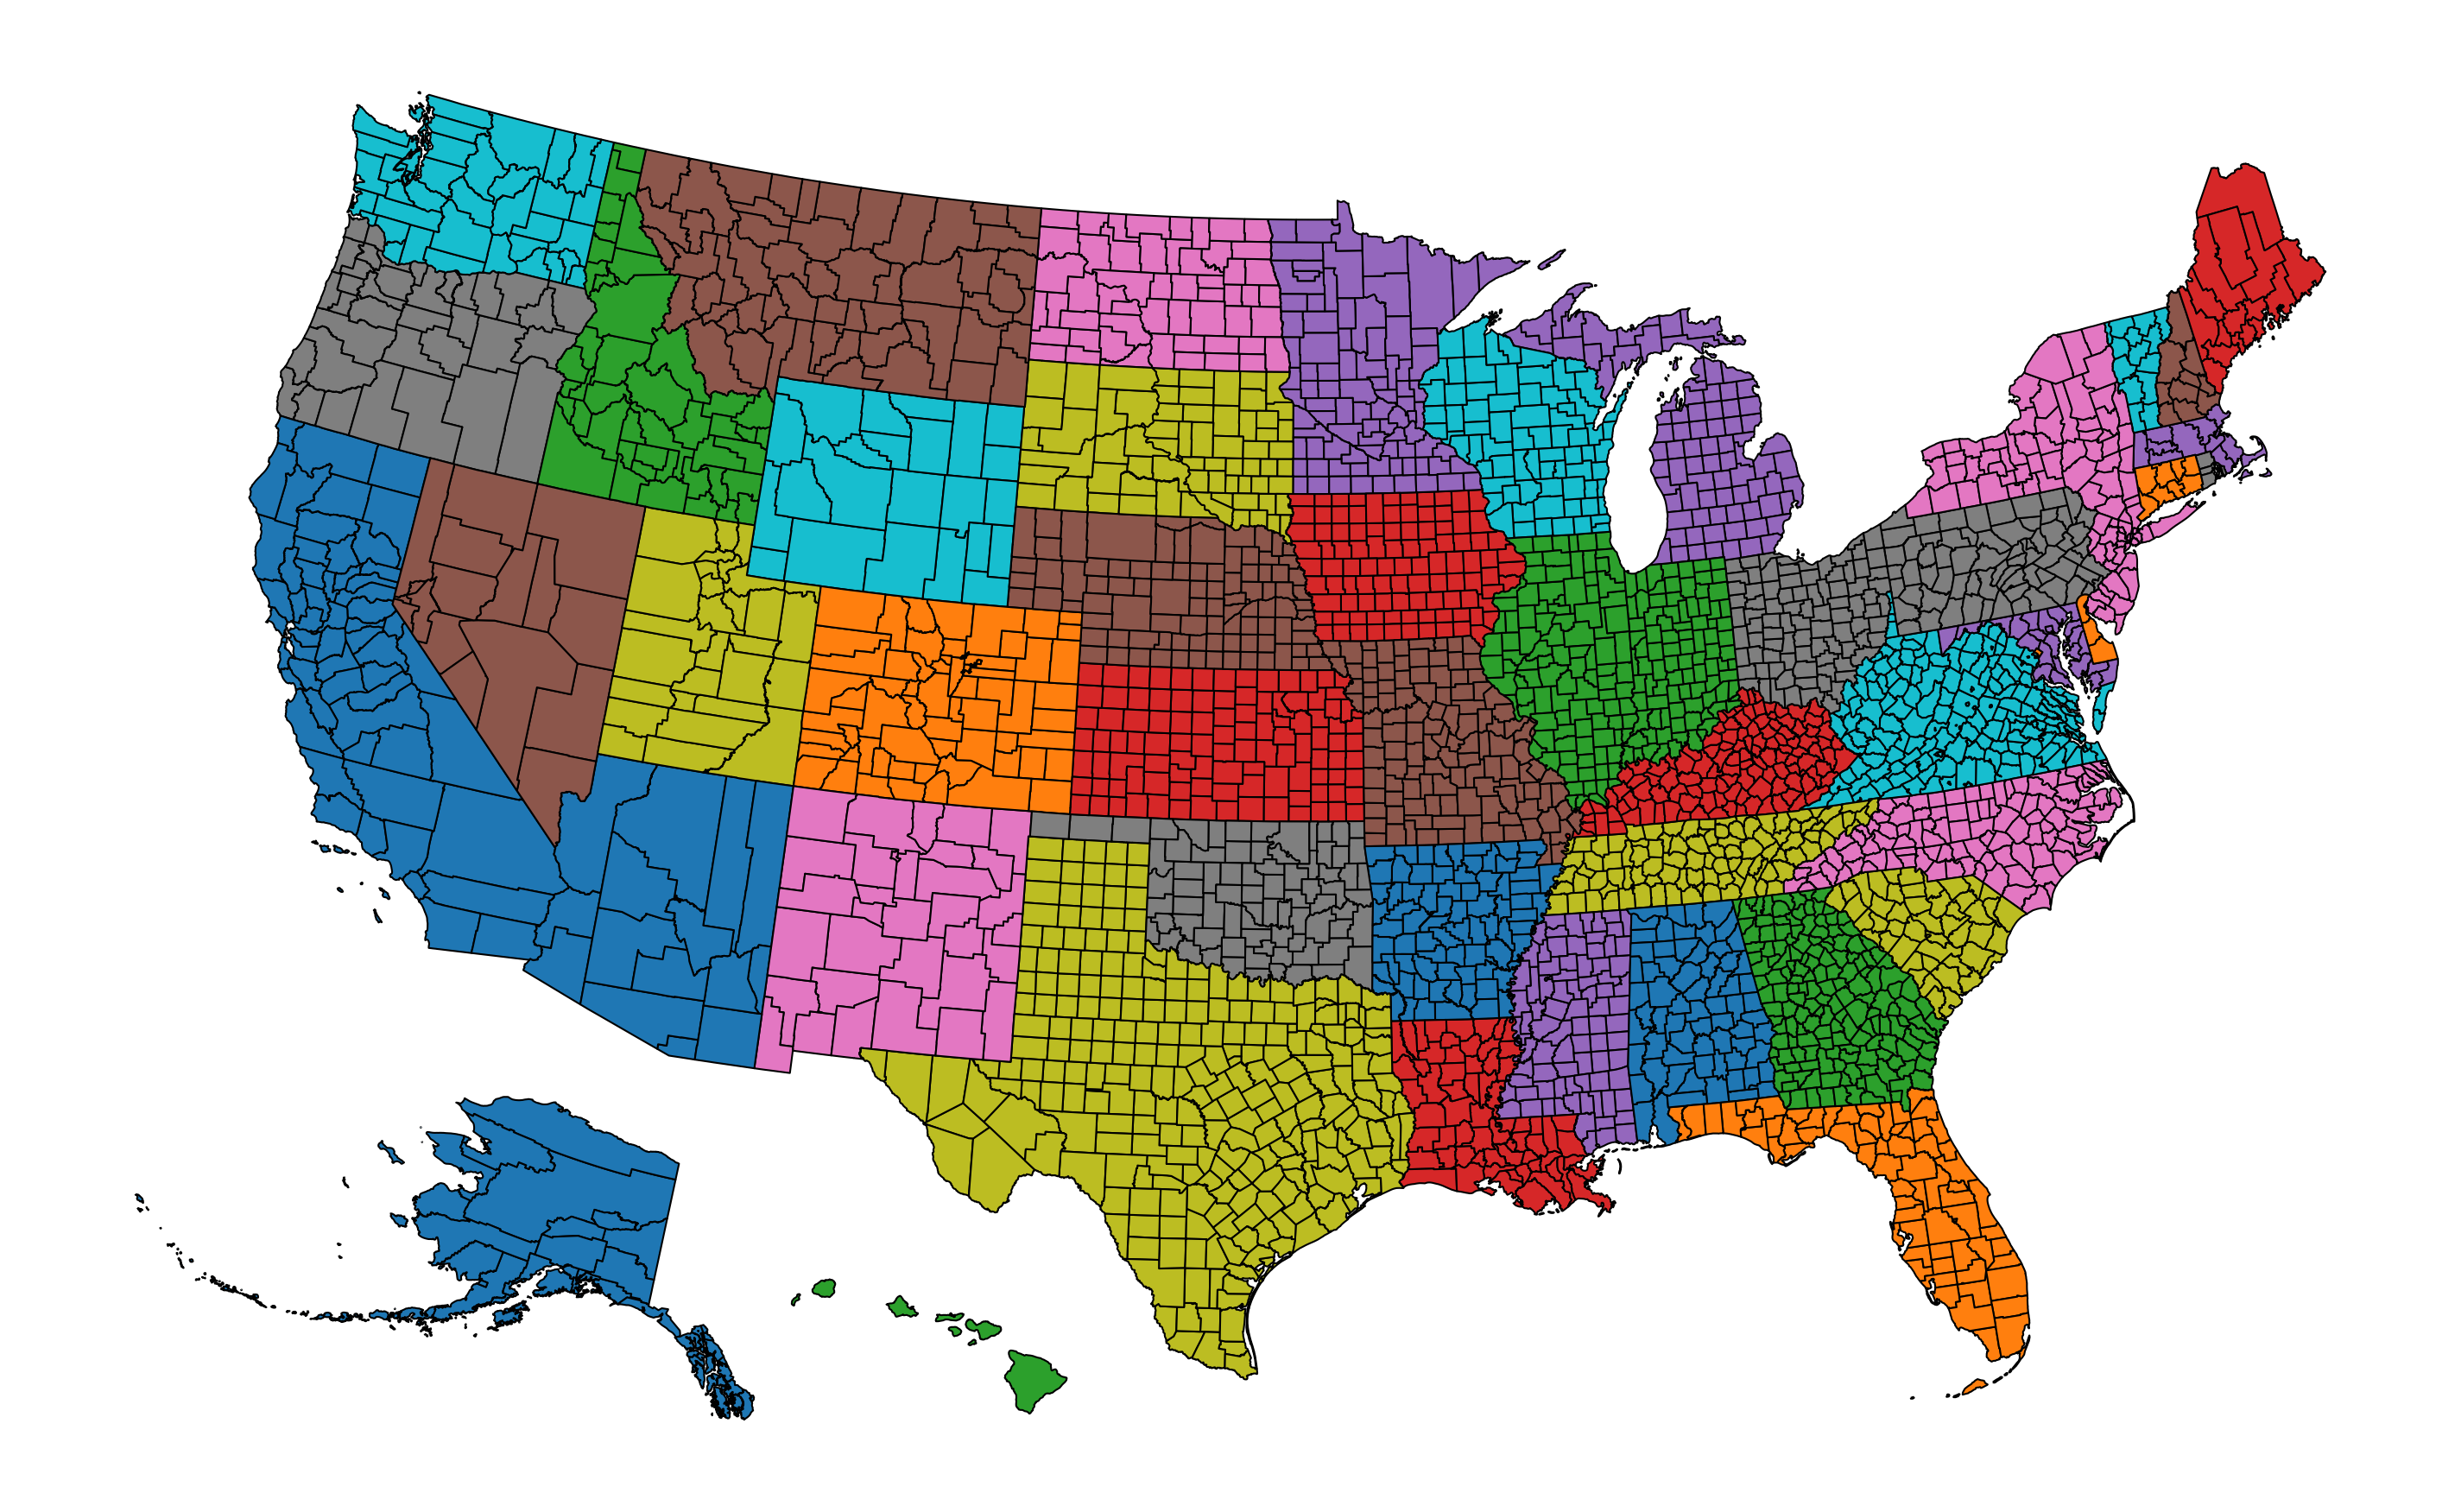

In [63]:
#Same for counties:
###################

#Translate and shrink AK
###
ak_gdf_county = county_gdf2.loc[county_gdf2.STATEFP == '02']

ak_gdf_county.geometry = ak_gdf_county.geometry.translate(xoff=ak_x_translate, yoff=ak_y_translate)
ak_gdf_county.geometry = ak_gdf_county.geometry.scale(xfact=ak_x_scale, yfact=ak_y_scale, origin=(ak_gdf.centroid.x.values[0], ak_gdf.centroid.y.values[0]))
ak_gdf_county.geometry = ak_gdf_county.geometry.rotate(angle = ak_rotate, origin=(ak_gdf.centroid.x.values[0], ak_gdf.centroid.y.values[0]))


#Hawaii
###
hi_gdf_county = county_gdf2.loc[county_gdf2.STATEFP == '15']

hi_gdf_county.geometry = hi_gdf_county.geometry.translate(xoff=hi_x_translate, yoff=hi_y_translate)
hi_gdf_county.geometry = hi_gdf_county.geometry.scale(xfact=hi_x_scale, yfact=hi_y_scale, origin='center')
hi_gdf_county.geometry = hi_gdf_county.geometry.rotate(angle = hi_rotate, origin=(hi_gdf.centroid.x.values[0], hi_gdf.centroid.y.values[0]))


#Update geometries:
####
county_gdf3['geometry'].loc[county_gdf3.STATEFP == '02'] = ak_gdf_county.geometry
county_gdf3['geometry'].loc[county_gdf3.STATEFP == '15'] = hi_gdf_county.geometry


#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)
county_gdf3.plot(ax = ax1, linewidth=.5, edgecolor='black', column='STATEFP', categorical=True)

ax1.set_axis_off()

### Back to Contiguous US...

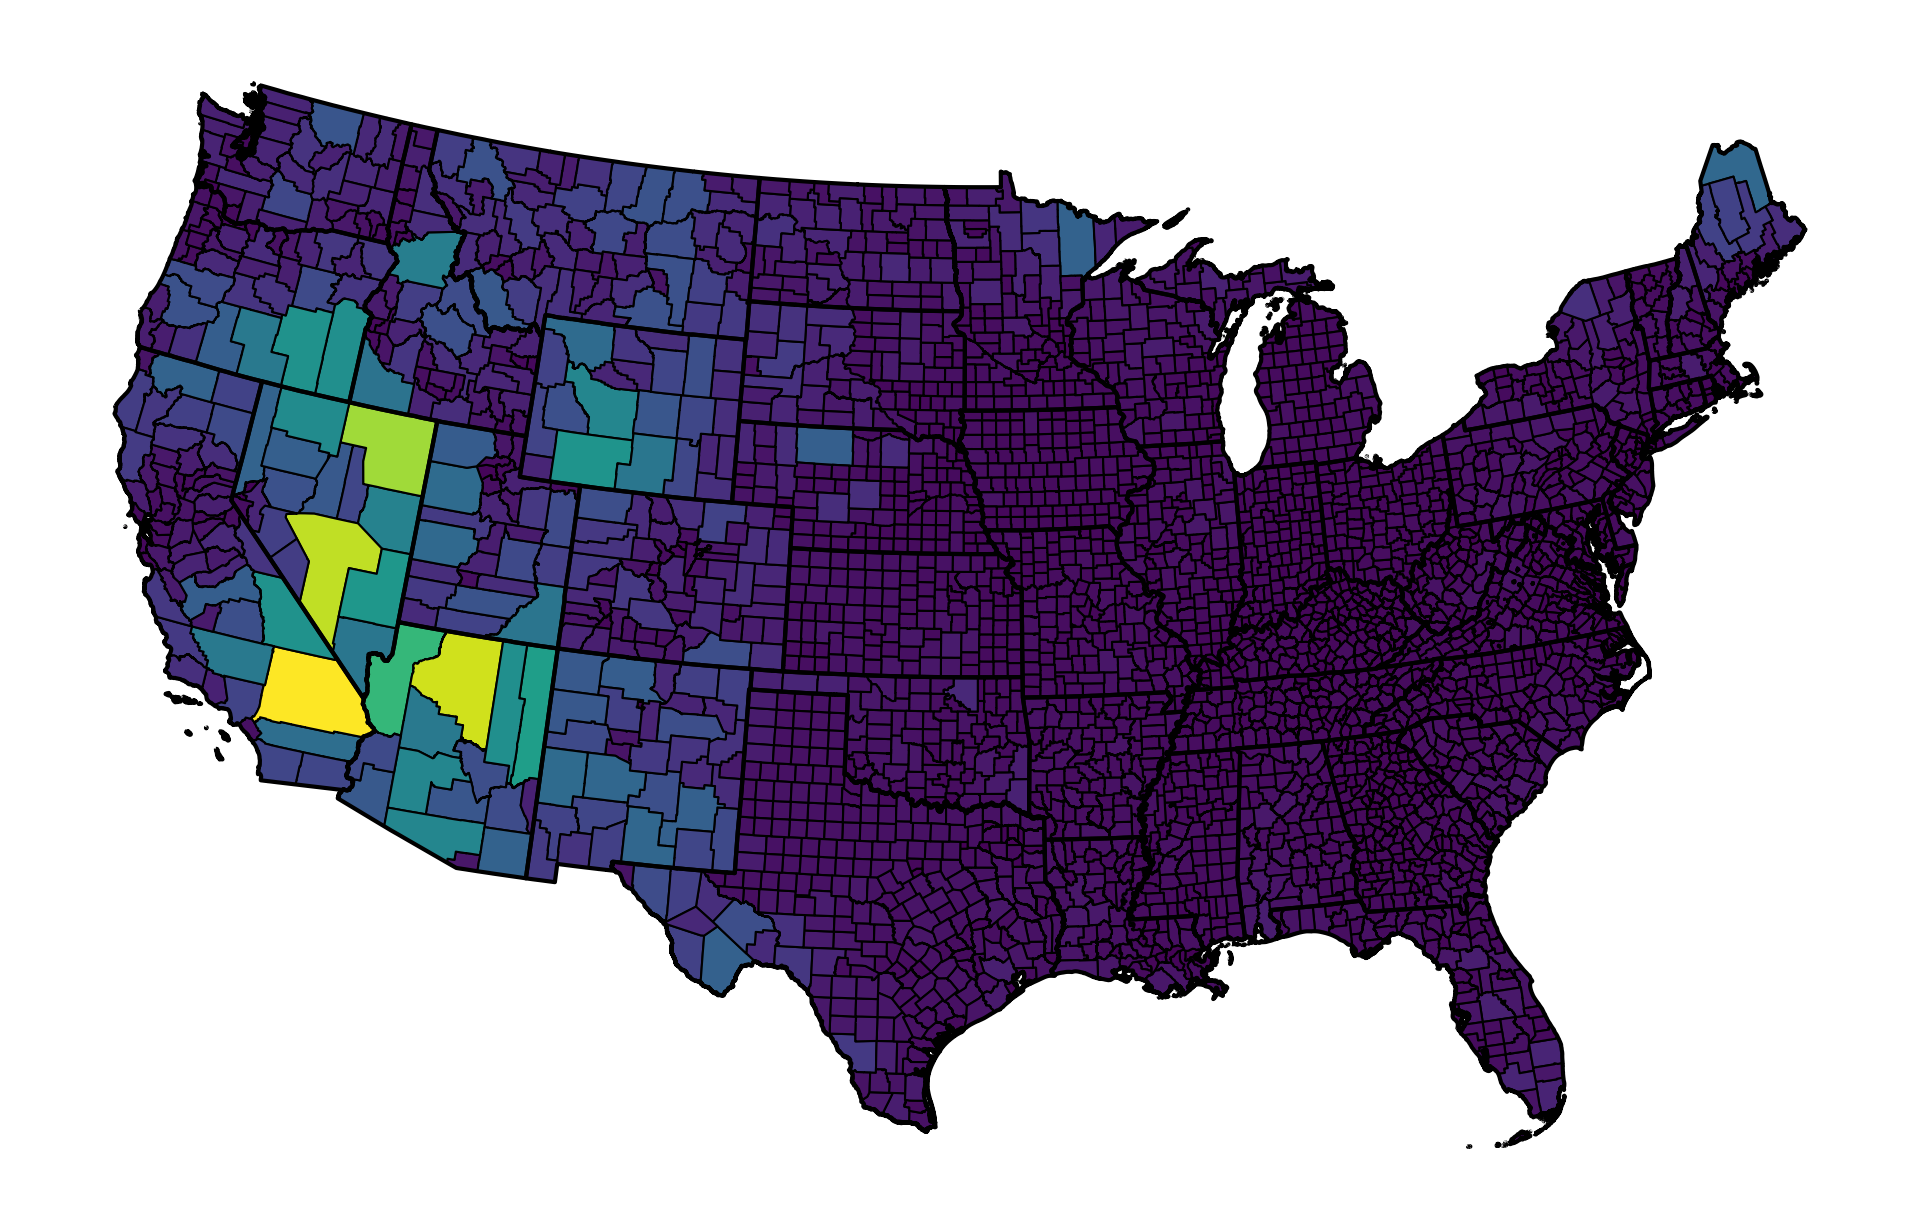

In [64]:
#Recall:
##########
fig, ax1 = plt.subplots(1,1, figsize=(8, 8), dpi=300)

#Draw the counties:
county_gdf.plot(ax = ax1, linewidth = .5, edgecolor = 'black', column = 'ALAND')

#And the states as outline
state_gdf.plot(ax = ax1, linewidth = 1, edgecolor = 'black', facecolor = 'none')

ax1.set_axis_off()

In [65]:
#Note the area:
#######

#Million km2
county_gdf.area.sum() / 1e3 / 1e6

7804.411879844363

In [66]:
#Compare to sum of ALAND:
county_gdf.ALAND.sum() / 1e3 / 1e6

7654.957220029

In [67]:
#And sum of ALAND + AWATER:
county_gdf.ALAND.sum() / 1e3 / 1e6 + county_gdf.AWATER.sum() / 1e3 / 1e6

8096.526351575

**FIPS**

Note that each county has a `STATEFP` and a `COUNTYFP`.  We can concatenate these into a single FIPS, to uniquely identify each county and make for easy merging...

In [68]:
#We can make a single FIPS like so: Concatenate strings:
county_gdf['FIPS'] = county_gdf.STATEFP + county_gdf.COUNTYFP

In [69]:
#Quick Check
list(county_gdf['FIPS'])

['20161',
 '19159',
 '30009',
 '16007',
 '55011',
 '31185',
 '08037',
 '42129',
 '40079',
 '48053',
 '36017',
 '20109',
 '47053',
 '27061',
 '25017',
 '36119',
 '46093',
 '54107',
 '19021',
 '47021',
 '05019',
 '51105',
 '27013',
 '56033',
 '22087',
 '19015',
 '39035',
 '45027',
 '41035',
 '45015',
 '25005',
 '25015',
 '49025',
 '37127',
 '44007',
 '42111',
 '45059',
 '48057',
 '49017',
 '48341',
 '27167',
 '48185',
 '05073',
 '49047',
 '53043',
 '25025',
 '36025',
 '06059',
 '36115',
 '37043',
 '06111',
 '46127',
 '13021',
 '41051',
 '48035',
 '17017',
 '13049',
 '29033',
 '31157',
 '26119',
 '09011',
 '13283',
 '37119',
 '54043',
 '45035',
 '34041',
 '12095',
 '47001',
 '05021',
 '24047',
 '27145',
 '48471',
 '24003',
 '30059',
 '22053',
 '22055',
 '39043',
 '01033',
 '38105',
 '22011',
 '48407',
 '13309',
 '13279',
 '24033',
 '29143',
 '42097',
 '17129',
 '12125',
 '28079',
 '31091',
 '41043',
 '13077',
 '29087',
 '10005',
 '06063',
 '12069',
 '42131',
 '51163',
 '22113',
 '51001',


#### Example of Arizona

In [70]:
display(county_gdf.loc[county_gdf.STATEFP == '04'].head(20))

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME  \
158       04      015  00025445  0500000US04015  04015      Mohave   
331       04      005  00025443  0500000US04005  04005    Coconino   
487       04      007  00040471  0500000US04007  04007        Gila   
588       04      025  00042809  0500000US04025  04025     Yavapai   
641       04      027  00023901  0500000US04027  04027        Yuma   
937       04      021  00025447  0500000US04021  04021       Pinal   
1166      04      009  00025444  0500000US04009  04009      Graham   
1216      04      013  00037026  0500000US04013  04013    Maricopa   
1260      04      001  00025441  0500000US04001  04001      Apache   
1351      04      012  00043540  0500000US04012  04012      La Paz   
1908      04      017  00042808  0500000US04017  04017      Navajo   
2275      04      011  00042807  0500000US04011  04011    Greenlee   
2716      04      023  00040472  0500000US04023  04023  Santa Cruz   
2809      04      019  00025446  0500000US04019  04019        Pima   
3087      04      003  00025442  0500000US04003  04003     Cochise   

               NAMELSAD STUSPS STATE_NAME LSAD        ALAND     AWATER  \
158       Mohave County     AZ    Arizona   06  34530024782  333401646   
331     Coconino County     AZ    Arizona   06  48216135500  116631423   
487         Gila County     AZ    Arizona   06  12322070149   96465330   
588      Yavapai County     AZ    Arizona   06  21038299574   11356180   
641         Yuma County     AZ    Arizona   06  14280774791   13253159   
937        Pinal County     AZ    Arizona   06  13899612888   20747424   
1166      Graham County     AZ    Arizona   06  11970605955   47476264   
1216    Maricopa County     AZ    Arizona   06  23833061798   62173467   
1260      Apache County     AZ    Arizona   06  29003491828   54145120   
1351      La Paz County     AZ    Arizona   06  11646086700   36514200   
1908      Navajo County     AZ    Arizona   06  25769070671   24116169   
2275    Greenlee County     AZ    Arizona   06   4771128169   13746346   
2716  Santa Cruz County     AZ    Arizona   06   3201853239    3068237   
2809        Pima County     AZ    Arizona   06  23798578890    5112016   
3087     Cochise County     AZ    Arizona   06  16083178109   17664572   

                                               geometry   FIPS  
158   POLYGON ((-1662579.799 1613337.218, -1662182.2...  04015  
331   POLYGON ((-1540947.192 1584540.288, -1540653.1...  04005  
487   POLYGON ((-1431927.361 1351869.000, -1431823.3...  04007  
588   POLYGON ((-1566881.176 1434000.043, -1566805.7...  04025  
641   POLYGON ((-1746851.979 1221914.112, -1746649.6...  04027  
937   POLYGON ((-1506275.421 1180500.226, -1506270.4...  04021  
1166  POLYGON ((-1332458.371 1237801.718, -1332047.1...  04009  
1216  POLYGON ((-1589798.482 1310318.916, -1589513.9...  04013  
1260  POLYGON ((-1229881.129 1641289.790, -1229880.9...  04001  
1351  POLYGON ((-1721663.073 1307456.053, -1721506.2...  04012  
1908  POLYGON ((-1329288.696 1433712.770, -1329169.1...  04017  
2275  POLYGON ((-1246273.334 1212079.223, -1238997.3...  04011  
2716  POLYGON ((-1447435.685 1055756.802, -1430334.1...  04023  
2809  POLYGON ((-1610883.864 1195413.229, -1582771.5...  04019  
3087  POLYGON ((-1362182.400 1046165.500, -1361688.8...  04003

In [71]:
#Example: Arizona:

fig, ax1 = plt.subplots(1,1, figsize=(12, 8))

#Show Arizona, Highlight Maricopa:
county_gdf.loc[county_gdf.STATEFP == '04'].plot(ax = ax1, column = 'ALAND')
county_gdf.loc[county_gdf.FIPS == '04013'].plot(ax = ax1, linewidth = 5, edgecolor = 'black', facecolor='none')

<AxesSubplot: >

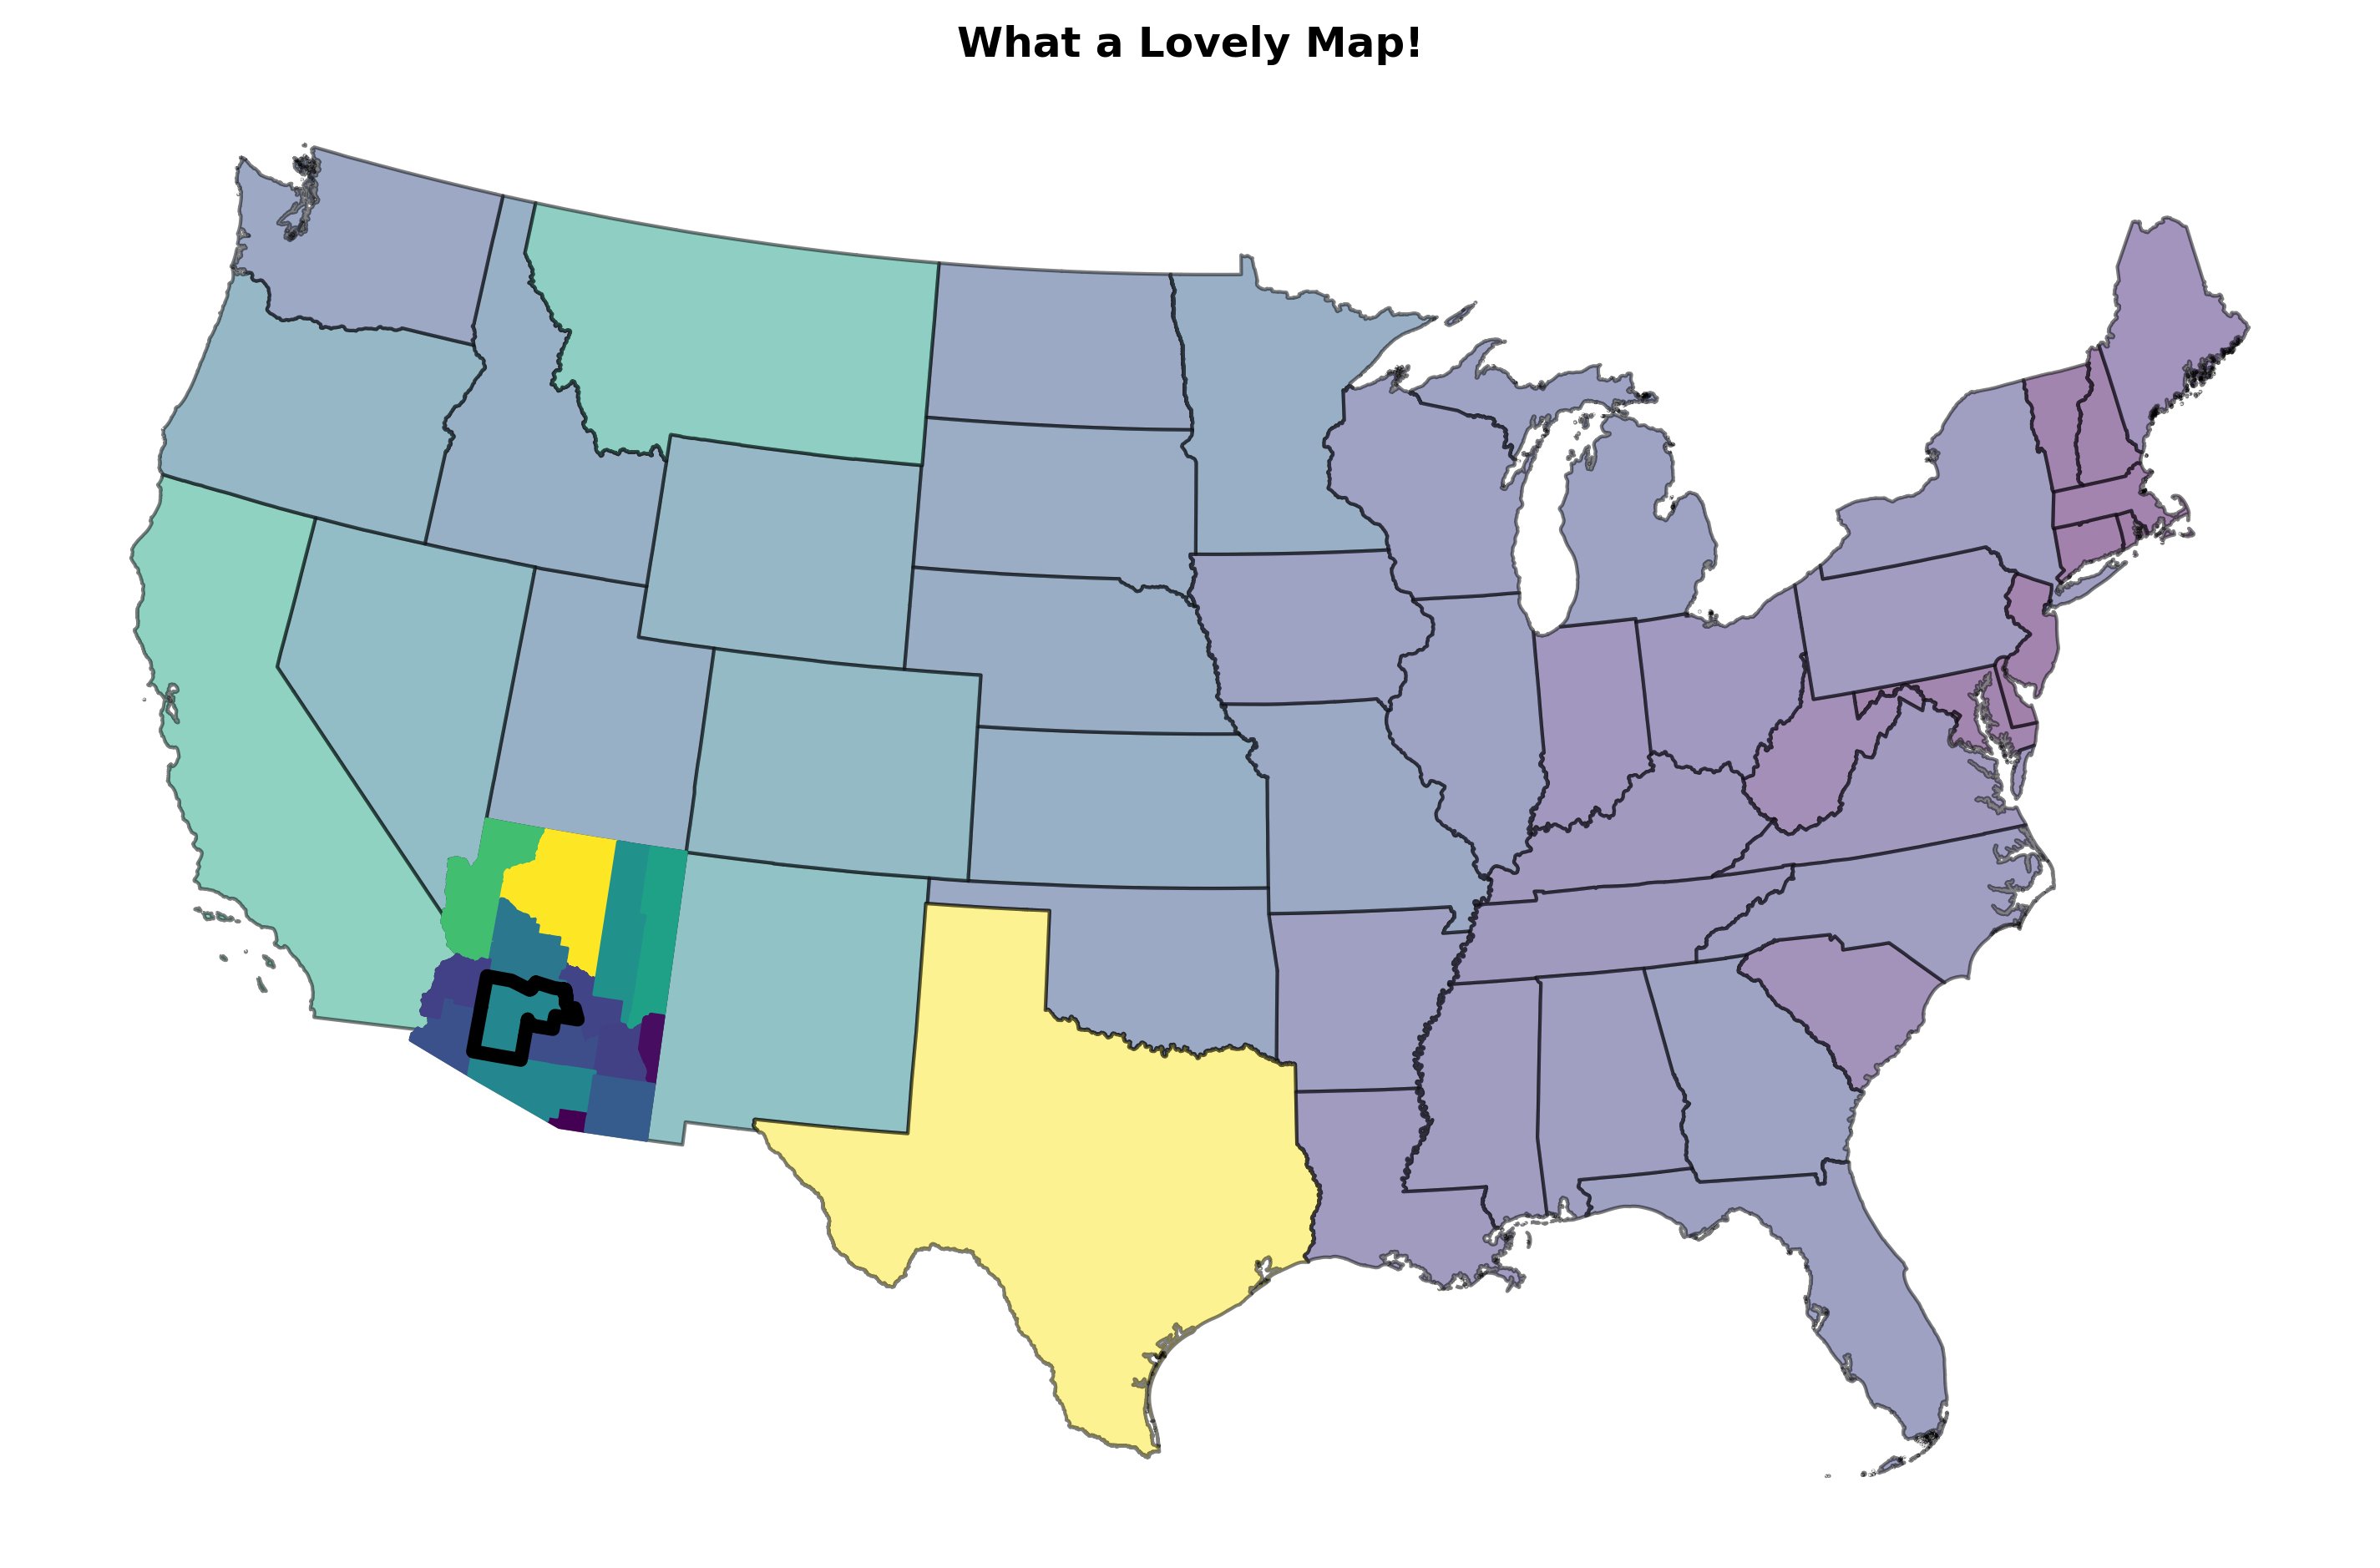

In [72]:
#Highlight Arizona and Maricopa County on National Map Background:

fig, ax1 = plt.subplots(1,1, figsize=(12, 8), dpi=300)

state_gdf.plot(ax = ax1, edgecolor = 'black', column = 'ALAND', alpha=.5)
county_gdf.loc[county_gdf.STATEFP == '04'].plot(ax = ax1, column = 'ALAND', edgecolor='face')
county_gdf.loc[county_gdf.FIPS == '04013'].plot(ax = ax1, linewidth = 4, edgecolor = 'black', facecolor='none')

ax1.set_axis_off()
ax1.set_title('What a Lovely Map!', fontweight='bold');


### Merging Census Demographic Data

Load Census dataset with county-level data, add FIPS code

In [73]:
#Here's our URL:
url_name = r'https://www2.census.gov/programs-surveys/popest/datasets/2010-2020/counties/totals/co-est2020-alldata.csv'

#Note the encoding:
df = pd.read_csv(url_name, encoding = "ISO-8859-1", engine='python')

df.head()


SUMLEV  REGION  DIVISION  STATE  COUNTY   STNAME         CTYNAME  \
0      40       3         6      1       0  Alabama         Alabama   
1      50       3         6      1       1  Alabama  Autauga County   
2      50       3         6      1       3  Alabama  Baldwin County   
3      50       3         6      1       5  Alabama  Barbour County   
4      50       3         6      1       7  Alabama     Bibb County   

  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  ...  RNETMIG2011  \
0       4779736            4780118          4785514  ...     0.680010   
1         54571              54582            54761  ...     6.236931   
2        182265             182263           183121  ...    16.705437   
3         27457              27454            27325  ...     0.329254   
4         22915              22904            22858  ...    -4.912927   

   RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  RNETMIG2016  \
0     1.282825     1.614391     0.653828     0.730419     0.854384   
1    -5.971016    -3.773344     2.206640    -1.529706     4.954403   
2    17.670696    22.924288    20.300088    17.902273    21.436499   
3    -6.860371    -8.093425    -5.063857   -15.677998   -18.377839   
4    -3.789130    -5.800695     1.420612     1.286202    -0.841769   

   RNETMIG2017  RNETMIG2018  RNETMIG2019  RNETMIG2020  
0     1.197150     1.966095     2.677866     3.091308  
1     0.993228    -0.018021     3.486011     6.290545  
2    22.476720    24.846335    25.242507    26.401562  
3   -25.138734    -8.790155    -6.257064     0.649799  
4    -3.235672    -7.271592     0.268980    -7.199262  

[5 rows x 180 columns]

In [74]:
#Let's list the columns:
#########

list(df.columns)

['SUMLEV',
 'REGION',
 'DIVISION',
 'STATE',
 'COUNTY',
 'STNAME',
 'CTYNAME',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'POPESTIMATE2016',
 'POPESTIMATE2017',
 'POPESTIMATE2018',
 'POPESTIMATE2019',
 'POPESTIMATE2020',
 'NPOPCHG_2010',
 'NPOPCHG_2011',
 'NPOPCHG_2012',
 'NPOPCHG_2013',
 'NPOPCHG_2014',
 'NPOPCHG_2015',
 'NPOPCHG_2016',
 'NPOPCHG_2017',
 'NPOPCHG_2018',
 'NPOPCHG_2019',
 'NPOPCHG_2020',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'BIRTHS2020',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DEATHS2020',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NATURALINC2014',
 'NATURALINC2015',
 'NATURALINC2016',
 'NATURALIN

In [75]:
#Consider our identifiers:
df.COUNTY

0        0
1        1
2        3
3        5
4        7
        ..
3189    37
3190    39
3191    41
3192    43
3193    45
Name: COUNTY, Length: 3194, dtype: int64

In [78]:
#Let's construct a FIPS for df, using zfill:
#This will give us a leading 0:
df.COUNTY.astype(str).str.zfill(3)

0       000
1       001
2       003
3       005
4       007
       ... 
3189    037
3190    039
3191    041
3192    043
3193    045
Name: COUNTY, Length: 3194, dtype: object

In [79]:
df.STATE.astype(str).str.zfill(2)

0       01
1       01
2       01
3       01
4       01
        ..
3189    56
3190    56
3191    56
3192    56
3193    56
Name: STATE, Length: 3194, dtype: object

In [80]:
#Now create the FIPS:
#####################

df['FIPS'] = df.STATE.astype(str).str.zfill(2) + df.COUNTY.astype(str).str.zfill(3)

In [81]:
df['FIPS']

0       01000
1       01001
2       01003
3       01005
4       01007
        ...  
3189    56037
3190    56039
3191    56041
3192    56043
3193    56045
Name: FIPS, Length: 3194, dtype: object

In [82]:
#And merge shapefiles with demographic data:
#####################

#Call it gdf_county_all, in that it has all our demographic variables
#gdf_county_all = county_gdf.merge(df,  on = 'FIPS', how='left')
gdf_county_all = county_gdf.merge(df, left_on='FIPS', right_on='FIPS', how='left')

In [86]:
#Plot a single variable:
#####
fig1, ax1 = plt.subplots(1,1, figsize=(14, 10))

gdf_county_all.plot(ax=ax1, column='POPESTIMATE2020', scheme='quantiles', k=10, legend=True,
                    edgecolor='black', linewidth=.5,
                    legend_kwds={'loc':'lower left'})

ax1.set_axis_off()
ax1.set_title('County Population', fontweight='bold', fontsize=14, y=.95)

Text(0.5, 0.95, 'County Population')

Text(0.5, 0.95, 'County Population Density')

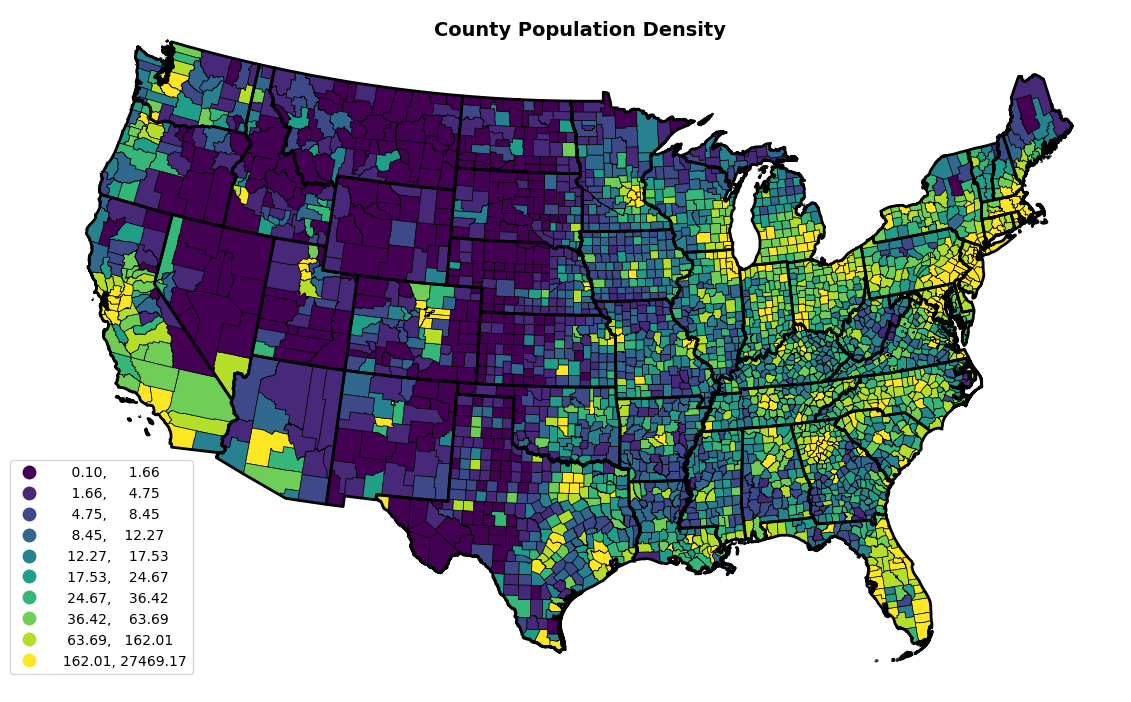

In [84]:
#And Plot 2020 Population *Density*!
#Plus More Aesthetics!
########

fig1, ax1 = plt.subplots(1,1, figsize=(14, 10))

#Do persons per square kilometer:
gdf_county_all.plot(ax=ax1, column = gdf_county_all.POPESTIMATE2020 / gdf_county_all.ALAND * 1e6,
                    edgecolor='black', linewidth=.5, scheme='quantiles', k = 10, cmap='viridis',
                    legend=True, legend_kwds={'bbox_to_anchor':(0.15, 0.35)})

#Go ahead and add state outlines:
state_gdf.plot(ax=ax1, edgecolor='black', linewidth=2, facecolor='none')

#Some aesthetics
ax1.set_axis_off()
ax1.set_title('County Population Density', fontweight='bold', fontsize=14, y=.95)